
# VaR Monte Carlo Sim: HW11

CUNY MSDA - DATA 602: Advanced Programming Techniques<br>
_Author - Walt Wells_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Perform a Monte Carlo simulation to calculate Value at Risk (VaR) for the Apple stock price using the file attached to this lesson. There exist a number of ways to do this type of analysis, but you can follow this basic procedure (refer to this PDF mc.pdf)

* The file (apple.2011.csv) has 3 columns: date, price, and percent change.  The information you are really interested in is the percent change.  This value is the percent change in the price from the previous date to the date on the corresponding row.
* Use the percent change values to create a Gaussian random number generator.  This generator will create Gaussian-distributed randoms to use as hypothetical percent changes on the day to day price of Apple stock.
* With that generator, create 20 random numbers.  With these randoms, you can find a potential price change over 20 days.
* Start with the price from the last row and the random numbers to determine a hypothetical price after 20 days.  To do this, take that last price, apply a percent change and get a new price.  Then take that new price, and apply the next percent change.  Do this for the 20 randoms, and get a final price.
* Store the final price after 20 days (you can discard the intermediate price values).
* Repeat steps 3-5 a very large number of times.  Something like 10000.  Each run will yield a different result.
* Take all of the stored prices (10000 or so), sort them, and find the 1% lowest percentile.  This value is the final result, and represents the VaR with 99% confidence.  This means that the price will be above this result after 20 days with a confidence level of 99%.

### Load and Clean Data

In [2]:
apple = pd.read_csv('apple.2011.csv', names = ['date', 'price', 'per_change'], skiprows=1)
apple['date'] = pd.to_datetime(apple['date'])
apple['per_change'] = pd.to_numeric(apple['per_change'], errors='coerce')
print apple.dtypes
print apple.head(10)
apple.shape

date          datetime64[ns]
price                float64
per_change           float64
dtype: object
        date    price  per_change
0 2011-01-03  329.570         NaN
1 2011-01-04  331.290    0.005219
2 2011-01-05  334.000    0.008180
3 2011-01-06  333.730   -0.000808
4 2011-01-07  336.120    0.007161
5 2011-01-10  342.455    0.018847
6 2011-01-11  341.640   -0.002380
7 2011-01-12  344.420    0.008137
8 2011-01-13  345.680    0.003658
9 2011-01-14  348.480    0.008100


(252, 3)

### Get Values, Function to Generate Walk

In [3]:
mu = np.mean(apple['per_change'])
sigma = np.std(apple['per_change'])
lastprice = apple.price.iloc[-1]
mu, sigma, lastprice

(0.00095735520717131473, 0.016487613979893453, 405.0)

In [4]:
def montecarlowalk(walklength):
    price = lastprice
    randlist = np.random.normal(mu, sigma, walklength)
    for i in randlist:
        price = price + price * i
    return price

In [5]:
test = montecarlowalk(20)
test

393.12308058712631

### Run 10000 times, Determine 99% VaR

In [6]:
n = 10000
monte = [montecarlowalk(20) for i in range(n)]
VaR99 = np.percentile(monte, 1)
VaR95 = np.percentile(monte, 5)

### Plot Results

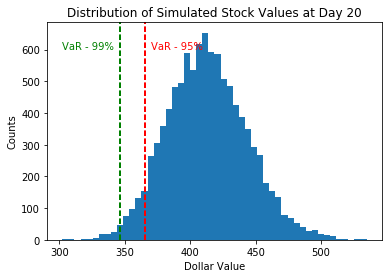

In [8]:
plt.hist(monte, bins=50)
plt.title('Distribution of Simulated Stock Values at Day 20')
plt.xlabel('Dollar Value')
plt.ylabel('Counts')
plt.axvline(VaR99, color='g', linestyle='dashed', linewidth=2)
plt.text(VaR99 - 44,600,'VaR - 99%', color='g')
plt.axvline(VaR95, color='r', linestyle='dashed', linewidth=2)
plt.text(VaR95 + 5, 600,'VaR - 95%', color='r')
plt.show()

In [9]:
VaR99

346.40620349995152

Based on our Monte Carlo simulation using historical metrics collected from observing 252 days of Apple stock, we are 99% confident the price after 20 days will be greater than the number above.   

We can look at historical data and determine that on 1.19.2012, the stock price was indeed well above this threshold - $427.75.

### References

* https://finance.yahoo.com/quote/AAPL/history?period1=1325224800&period2=1326952800&interval=1d&filter=history&frequency=1d
* https://pythonprogramming.net/monte-carlo-simulator-python/